<a href="https://colab.research.google.com/github/xBitly/JOKES/blob/master/PT2_GROUP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ПЗ 2



## Задача №17 стр. 62

In [30]:
from scipy.optimize import linprog
import numpy as np

In [31]:
c = [5, 1, -3, 2]

A_eq = [
    [3, 2, 1, 1],  # 3x1 + 2x2 + x3 + x4 = 7
    [5, 3, 1, 2]   # 5x1 + 3x2 +x3 + 2x4 = 11
]
b_eq = [7, 11]

In [32]:
bounds = [(0, None), (0, None), (0, None), (0, None)]

result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')

<ipython-input-32-a0e1b60465bf>:3: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')


In [33]:
if result.success:
    print("Optimal solution found:")
    x_rounded = np.round(result.x, decimals=2)
    print("x1 =", x_rounded[0])
    print("x2 =", x_rounded[1])
    print("x3 =", x_rounded[2])
    print("x4 =", x_rounded[3])
    print("Min value of Z(x):", np.round(result.fun, decimals=2))
else:
    print("No optimal solution found")

Optimal solution found:
x1 = 0.0
x2 = 0.0
x3 = 3.0
x4 = 4.0
Min value of Z(x): -1.0


## Задача №4 стр. 59

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [22]:
A = np.array([
    [1, -2],   # x1 - 2x2 <= 4
    [-1, 2],   # -x1 + 2x2 <= 4
    [1, 2]     # x1 + 2x2 <= 6
])

b = np.array([4, 4, 6])

c = np.array([-1, -2])

x1_vals = np.linspace(0, 8, 400)
x2_vals = np.linspace(0, 8, 400)

x2_1 = (x1_vals - 4) / 2
x2_2 = (x1_vals + 4) / 2
x2_3 = (6 - x1_vals) / 2

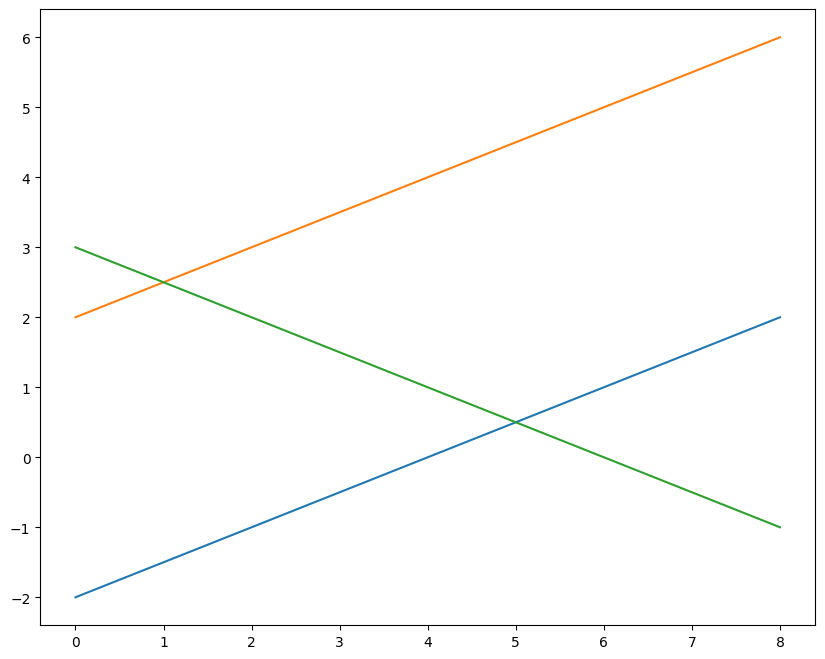

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(x1_vals, x2_1, label=r"$x_1 - 2x_2 \leq 4$")
plt.plot(x1_vals, x2_2, label=r"$-x_1 + 2x_2 \leq 4$")
plt.plot(x1_vals, x2_3, label=r"$x_1 + 2x_2 \leq 6$")

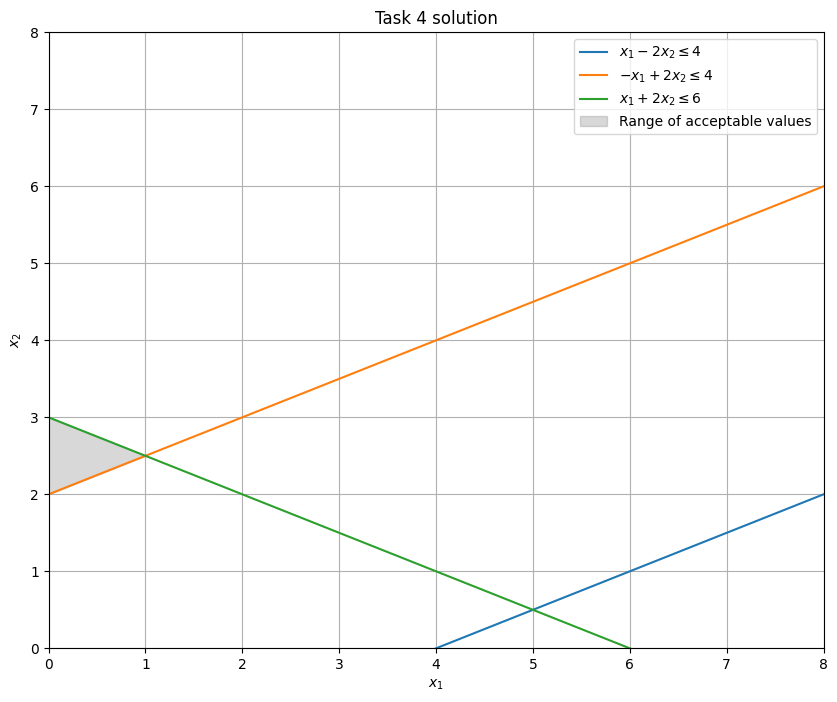

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(x1_vals, x2_1, label=r"$x_1 - 2x_2 \leq 4$")
plt.plot(x1_vals, x2_2, label=r"$-x_1 + 2x_2 \leq 4$")
plt.plot(x1_vals, x2_3, label=r"$x_1 + 2x_2 \leq 6$")
plt.fill_between(x1_vals, np.maximum(0, np.maximum(x2_1, x2_2)), x2_3,
                 where=(x2_3 >= np.maximum(0, np.maximum(x2_1, x2_2))),
                 color='gray', alpha=0.3, label="Range of acceptable values")

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("Task 4 solution")

plt.grid(True)
plt.show()

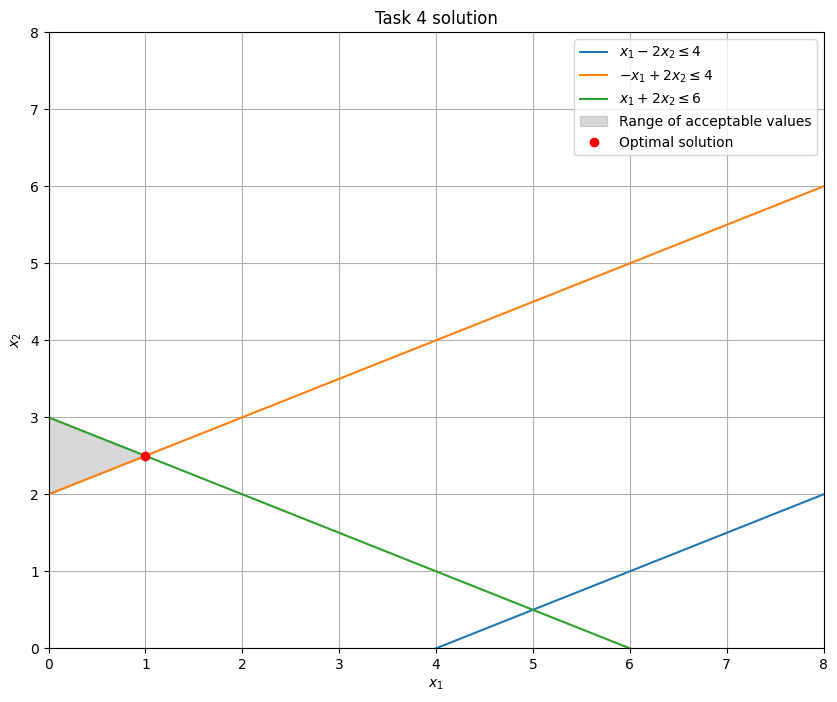

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(x1_vals, x2_1, label=r"$x_1 - 2x_2 \leq 4$")
plt.plot(x1_vals, x2_2, label=r"$-x_1 + 2x_2 \leq 4$")
plt.plot(x1_vals, x2_3, label=r"$x_1 + 2x_2 \leq 6$")
plt.fill_between(x1_vals, np.maximum(0, np.maximum(x2_1, x2_2)), x2_3,
                 where=(x2_3 >= np.maximum(0, np.maximum(x2_1, x2_2))),
                 color='gray', alpha=0.3, label="Range of acceptable values")

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("Task 4 solution")

result = linprog(c, A_ub=A, b_ub=b, bounds=[(0, None), (0, None)], method='highs')

if result.success:
    x1_opt, x2_opt = result.x
    plt.plot(x1_opt, x2_opt, 'ro', label="Optimal solution")
    plt.legend()

plt.grid(True)
plt.show()

In [26]:
x1_opt, x2_opt, -result.fun if result.success else ("No solution found", None, None)

(1.0, 2.5, 6.0)